<a href="https://colab.research.google.com/github/ghatanisuresh/DataScience_tutorial/blob/main/CorrelationVisulization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Correlation


In [ ]:
import pandas as pd

path = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

df = pd.read_csv(path)
df

,"18.0 8 307.0 130.0 3504. 12.0 70 1\t""chevrolet chevelle malibu"""
0,15.0 8 350.0 165.0 3693. 11...
1,18.0 8 318.0 150.0 3436. 11...
2,16.0 8 304.0 150.0 3433. 12...
3,17.0 8 302.0 140.0 3449. 10...
4,15.0 8 429.0 198.0 4341. 10...
...,...
392,27.0 4 140.0 86.00 2790. 15...
393,44.0 4 97.00 52.00 2130. 24...
394,32.0 4 135.0 84.00 2295. 11...
395,28.0 4 120.0 79.00 2625. 18...


The above data is not clear and improper format. So let's make this as a proper format.


In [ ]:
mpg = pd.read_csv(path, delim_whitespace= True, header = None)
mpg

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


The dataset  is from the UCI Machine Learning Repository for auto-mpg data. You’re right you saw that there are no columnsnames loaded by default since the header=None argument was used. To properly label the columns, we can refer to the documentation for this dataset.

Here are the typical columns/attributes for this dataset:

__mpg__: Miles per gallon (continuous)

__cylinders__: Number of cylinders (multi-valued discrete)

__displacement__: Engine displacement (continuous)

__horsepower__: Engine horsepower (continuous)

__weight__: Vehicle weight in pounds (continuous)

__acceleration__: Time to accelerate from 0 to 60 mph (continuous)

__model year__: The year the car was manufactured (multi-valued discrete)

__origin__: Origin of the car (multi-valued discrete)

__car name__: Name of the car (string)

To add these columns in our DataFrame, we can load dataset with  code as follows:

In [ ]:
columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
mpg_df = pd.read_csv(path, delim_whitespace = True, header = None, names = columns)
mpg_df


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,ford ranger


Checking Correlation

In [ ]:
mpg_df['mpg'].corr(mpg_df['weight'])

-0.8317409332443352

In [ ]:
mpg_df['cylinders'].corr(mpg_df['weight'])

0.8960167954533942

* Correlation between car's weight and weigth.

The output of -0.8317 suggests that there is a strong negative correlation between a car's weight and its fuel efficiency (mpg). This means that as the weight of the car increases, the fuel efficiency tends to decrease.


* Correlation between cylinders and weight.

The output of 0.8960 indicates a strong positive correlation between the number of cylinders and the weight of the car. This suggests that cars with more cylinders tend to be heavier.

In [ ]:
# check the correlation on the dataframe after removing unwanted columns
new_df = mpg_df.drop(['model year', 'origin', 'car name'], axis = 1)
new_df

,mpg,cylinders,displacement,horsepower,weight,acceleration
0,18.0,8,307.0,130.0,3504.0,12.0
1,15.0,8,350.0,165.0,3693.0,11.5
2,18.0,8,318.0,150.0,3436.0,11.0
3,16.0,8,304.0,150.0,3433.0,12.0
4,17.0,8,302.0,140.0,3449.0,10.5
...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6
394,44.0,4,97.0,52.00,2130.0,24.6
395,32.0,4,135.0,84.00,2295.0,11.6
396,28.0,4,120.0,79.00,2625.0,18.6


In [ ]:
new_df.corr()


ValueError: could not convert string to float: '?'

As in our dataset:

* Error occured: ValueError: could not convert string to float: '?'

* it indicates thare are 'string '?' exisist in the dataset, which is string type and can't convert to float.

So we need to convert them into proper format.

Let's check how many of such values exisited in the dataset.

In [ ]:
columns_with_question_mark = (mpg_df == '?').sum()
columns_with_question_mark

,0
mpg,0
cylinders,0
displacement,0
horsepower,6
weight,0
acceleration,0
model year,0
origin,0
car name,0


The output you're seeing indicates that the column horsepower contains 6 occurrences of the '?' character, which is likely representing missing or invalid data in this column.

In [ ]:
# check the data type of horsepower

new_df['horsepower'].dtype

dtype('O')

dtype('O'): The 'O' stands for "object" type in pandas. This means that the horsepower column is currently being treated as a string or mixed type (instead of numeric like int or float).

In [ ]:
# deal with above '?' occurences

new_df = new_df.replace('?', pd.NA)

In [ ]:
# convert into nmeric type first.

new_df['horsepower'] = pd.to_numeric(new_df['horsepower'], errors = 'coerce')

In [ ]:
new_df['horsepower'].dtype

dtype('float64')

The above null values are still not relevant for checking the correlation and should be thus handled.


__Handle the missing values:__

Either fill these missing values with the mean, median, or another appropriate value, or drop the rows with missing data.

# fill with mean value
new_df['horsepower'] = pd.to_numeric(new_df['horsepower'], errors='coerce') # Ensure all values are numeric
new_df['horsepower'] = new_df['horsepower'].fillna(new_df['horsepower'].mean()) # Fill NaN with mean


In [ ]:
#fill value with mean method

new_df['horsepower'] = new_df['horsepower'].fillna(new_df['horsepower'].mean())

In [ ]:
new_df.isna().sum()

,0
mpg,0
cylinders,0
displacement,0
horsepower,0
weight,0
acceleration,0


Data is clear now and can check the correlation.

In [ ]:
new_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741,0.420289
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017,-0.505419
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824,-0.543684
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574,-0.684259
weight,-0.831741,0.896017,0.932824,0.860574,1.000000,-0.417457
acceleration,0.420289,-0.505419,-0.543684,-0.684259,-0.417457,1.000000


This data represents a correlation matrix, which shows the relationship between different features (columns) in the dataset, such as mpg, cylinders, displacement, horsepower, weight, and acceleration.

Each value in the table represents the Pearson correlation coefficient between two variables, ranging from -1 to 1, where:

1: Perfect positive correlation (when one variable increases, the other also increases).

-1: Perfect negative correlation (when one variable increases, the other decreases).

0: No correlation (no linear relationship between the two variables).


### Key Interpretations:

__mpg (miles per gallon):__

Negative correlations with most variables:

weight (-0.8317): Strong negative correlation. Heavier cars tend to have lower fuel efficiency (mpg).

displacement (-0.8042): Strong negative correlation. Larger engine displacements are associated with lower mpg.

cylinders (-0.7754): Strong negative correlation. Cars with more cylinders generally have lower mpg.

horsepower (-0.7714): Strong negative correlation. Higher horsepower is associated with lower mpg.

Positive correlation with:

acceleration (0.4203): Moderate positive correlation. Cars with better acceleration tend to have better mpg, though this is a weaker correlation compared to the other variables.


__cylinders:__

Strong positive correlation with:

displacement (0.9507): Cars with more cylinders tend to have larger engine displacements.

weight (0.8960): Cars with more cylinders tend to be heavier.

horsepower (0.8389): Cars with more cylinders tend to have higher horsepower.

Negative correlation with:

mpg (-0.7754): Cars with more cylinders tend to have lower mpg.

acceleration (-0.5054): Moderate negative correlation. Cars with more cylinders tend to have lower acceleration performance.

__displacement:__

Strong positive correlation with:

cylinders (0.9507), weight (0.9328), horsepower (0.8936): Larger engine displacements are associated with more cylinders, higher horsepower, and greater weight.

Negative correlation with:

mpg (-0.8042): Larger engine displacements are associated with lower mpg.

acceleration (-0.5437): Larger engines are associated with slower acceleration.

__horsepower:__

Strong positive correlation with:

weight (0.8606): Higher horsepower cars tend to be heavier.

displacement (0.8936), cylinders (0.8389): More horsepower is
associated with larger engine displacements and more cylinders

Negative correlation with:

mpg (-0.7714): Higher horsepower cars tend to have lower mpg.
acceleration (-0.6843): Higher horsepower cars tend to have slower acceleration.
weight:

Strong positive correlation with:
displacement (0.9328), cylinders (0.8960), horsepower (0.8606): Heavier cars tend to have larger engines, more cylinders, and higher horsepower.

Negative correlation with:
mpg (-0.8317): Heavier cars tend to have lower fuel efficiency.
acceleration (-0.4175): Heavier cars tend to accelerate more slowly.
acceleration:

Positive correlation with:

mpg (0.4203): Cars with better acceleration tend to have better fuel efficiency.

Negative correlations with:

horsepower (-0.6843): Higher horsepower cars tend to accelerate more slowly.
displacement (-0.5437), cylinders (-0.5054): Cars with larger
engines or more cylinders tend to have slower acceleration.

weight (-0.4175): Heavier cars tend to accelerate more slowly.

### Summary:

* Fuel efficiency (mpg) is strongly negatively correlated with variables like weight, displacement, horsepower, and cylinders, meaning that cars with more cylinders, larger engines, or more weight tend to have lower mpg.

* Cylinders, displacement, horsepower, and weight are highly positively correlated with each other, indicating that cars with larger engines tend to also have more horsepower, weight, and cylinders.

* Acceleration tends to be negatively correlated with most performance-related attributes (horsepower, weight, displacement), indicating that more powerful and heavier cars may have slower acceleration times.

# Heatmap
For the nice visualization, use correlation matrix heatmap

[Text(0.5, 0, 'mpg'),
 Text(1.5, 0, 'cylinders'),
 Text(2.5, 0, 'displacement'),
 Text(3.5, 0, 'horsepower'),
 Text(4.5, 0, 'weight'),
 Text(5.5, 0, 'acceleration')]

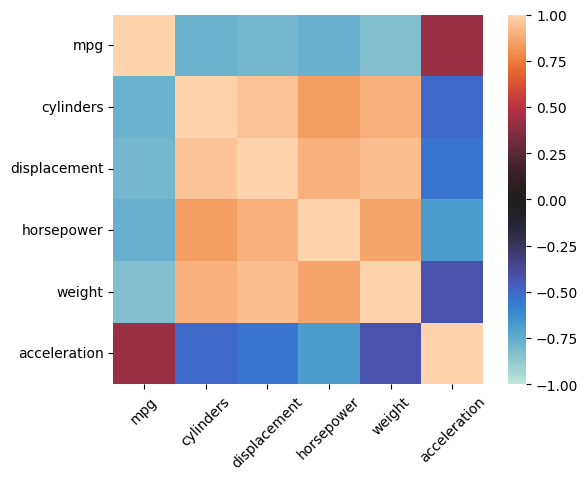

In [ ]:
import seaborn as sns
corr = new_df.corr()

ax = sns.heatmap(corr,
                 vmin = -1,
                 vmax = 1,
                 center = 0,
                 square = True)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45, horizontalalignment = 'right')


#### Heatmap Interpretation

Color Scale:

The heatmap uses a color scale to represent correlation values:

Dark red (closer to 1): Indicates a strong positive correlation between the variables.

Dark blue (closer to -1): Indicates a strong negative correlation.

Light colors near white (closer to 0): Represent weak or no correlation between the variables.


Diagonal Line:

The diagonal cells from the top-left to the bottom-right (where each variable is compared with itself) all have a value of 1, since a variable is perfectly correlated with itself.

Off-diagonal cells:

These cells show the correlation between different variables. For example:


mpg and weight: The dark blue color shows a strong negative correlation (around -0.83), meaning as car weight increases, miles per gallon (fuel efficiency) tends to decrease.

cylinders and displacement: The light orange color shows a strong positive correlation (close to 0.95), meaning cars with more cylinders tend to have larger engine displacements.

Overall Patterns:

Positive correlations are mostly observed between engine-related features like cylinders, displacement, horsepower, and weight.

Negative correlations are seen between mpg and features like cylinders, horsepower, and weight, indicating that cars with higher engine performance or weight tend to have lower fuel efficiency.

# Iris Dataset

Iris dataset, which is one of the most famous datasets loaded from seaborn's built-in repository.in machine learning. It contains measurements for 150 iris flowers from three different species.
The Iris dataset contains the following columns:

sepal_length: The length of the flower's sepal in centimeters.

sepal_width: The width of the flower's sepal in centimeters.

petal_length: The length of the flower's petal in centimeters.

petal_width: The width of the flower's petal in centimeters.

species: The species of the iris flower (either setosa,
versicolor, or virginica).T


In [14]:
import seaborn as sns
sns.set(style = "ticks", color_codes = True)
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [15]:
iris['species'].value_counts()

,count
species,
setosa,50
versicolor,50
virginica,50


In [16]:
new_iris =iris[['species', 'petal_length']].groupby('species')
new_iris

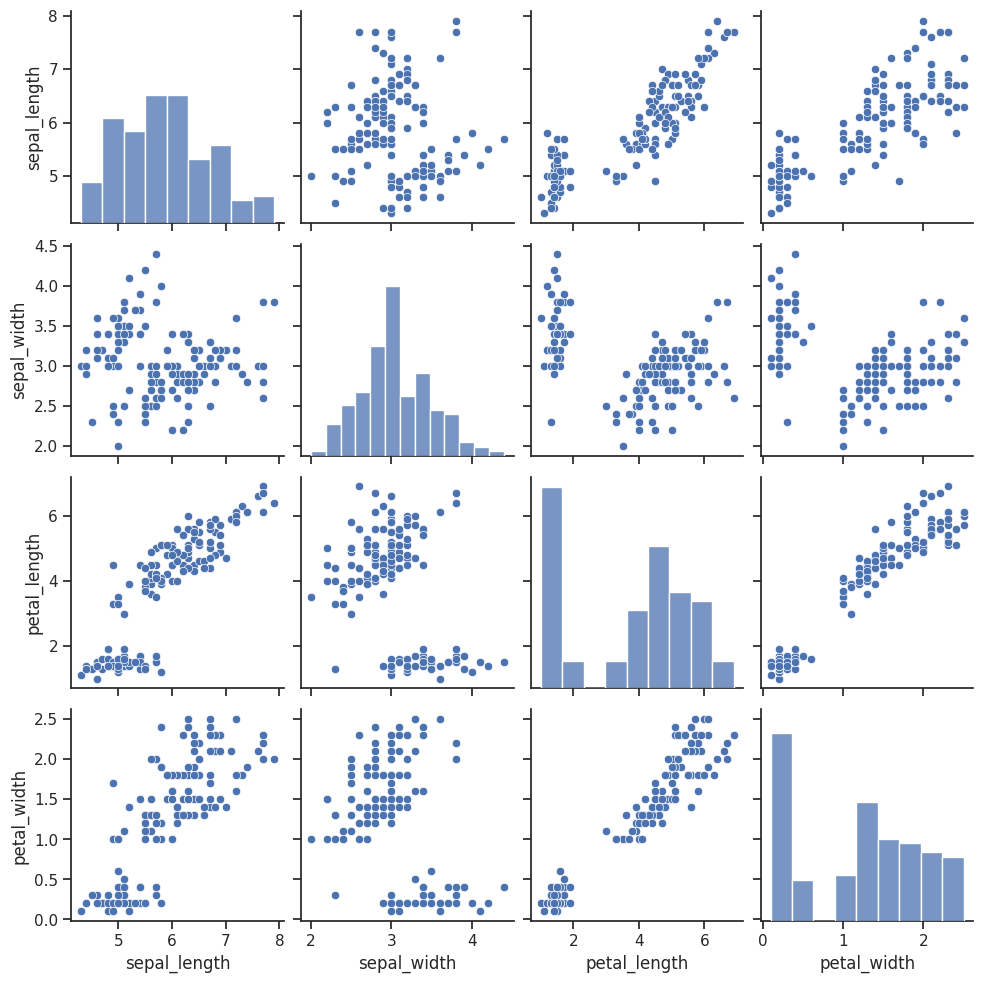

In [17]:
# pairplot on iris datatset
sns.pairplot(iris)


 **Pairplot** displayed in the image. Let's explain the key elements of this code and the resulting plot.

### Code Explanation:
- **`sns.pairplot()`**:
   - This function from the seaborn library creates a **grid of scatter plots** for each pair of numerical columns in the dataset. It also shows the distribution of each variable along the diagonal, using histograms or KDE plots.
   - **`iris`**: The dataset being passed to `sns.pairplot()`. In this case, it is the famous Iris dataset.

### Plot Explanation:
1. **Diagonal Elements** (e.g., top left, second row, second column, etc.):
   - These diagonal plots show the **distribution** of each individual variable using histograms. For example:
     - The top-left plot shows the distribution of `sepal_length`.
     - The second diagonal element shows the distribution of `sepal_width`.
     - And so on for the remaining variables: `petal_length`, `petal_width`.
   - The histograms help to understand the distribution shape (normal, skewed, etc.) of each attribute.

2. **Off-diagonal Elements**:
   - These are the **scatter plots** showing the relationships between pairs of variables. For example:
     - The second row, first column shows the relationship between `sepal_width` and `sepal_length`.
     - The third row, first column shows the relationship between `petal_length` and `sepal_length`.
   - Each scatter plot gives insight into the correlation between two variables. A **linear trend** suggests a strong relationship, while a **scattered, spread-out plot** suggests a weaker or no correlation.

### Key Insights from the Plot:
- There is a **clear linear relationship** between **`petal_length`** and **`petal_width`**, as indicated by the bottom right plot. This suggests that as one increases, the other tends to increase as well.
- The **scatter plots** between **`petal_length`** and **`sepal_length`** also show a strong positive correlation, implying that these two variables are strongly related.
- **`sepal_width`** appears to have a weaker correlation with other variables, as indicated by the more scattered plots.
- The **distributions** on the diagonal help show the spread and nature of the values in each variable. For instance, some variables may show a clear peak, while others are more spread out or have multiple peaks.

### Conclusion:
The pairplot is a great way to visually explore relationships between all pairs of numerical variables in the dataset. It helps to quickly identify patterns, relationships, and correlations, and it gives an idea of the distribution of each variable in the dataset.

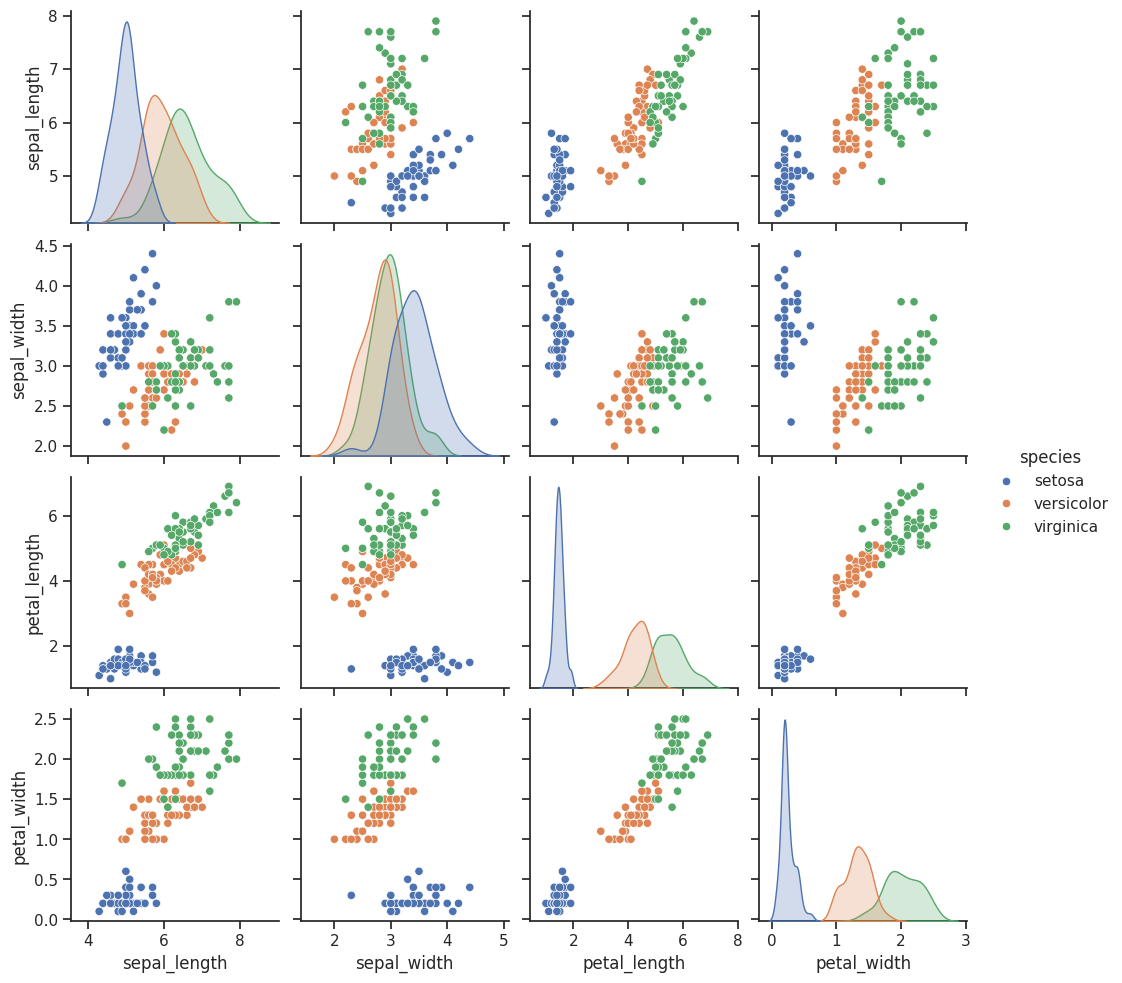

In [18]:
g = sns.pairplot(iris, hue = 'species')


This time it generates **enhanced pairplot** displayed in the image, where the data points are colored based on the species of the Iris flowers (`setosa`, `versicolor`, and `virginica`).

### Code Explanation:

1. **`g = sns.pairplot(iris, hue='species')`**:
   - **`sns.pairplot()`**: This function from the seaborn library generates a grid of scatter plots for each pair of variables, similar to the previous pairplot generated. However, this time, it adds a color distinction based on the species of the flowers.
   - **`hue='species'`**: This argument tells seaborn to color the data points based on the **`species`** column. The three species in the Iris dataset (`setosa`, `versicolor`, and `virginica`) are each assigned a different color for easy differentiation in the plots.

### Plot Explanation:

1. **Color coding**:
   - **Blue**: Represents the species *Setosa*.
   - **Orange**: Represents the species *Versicolor*.
   - **Green**: Represents the species *Virginica*.
   - The data points are colored differently to show how each species' attributes (sepal length, sepal width, petal length, petal width) compare to one another. This makes it easy to visually differentiate patterns between species.

2. **Diagonal Elements**:
   - The diagonal elements display **Kernel Density Estimation (KDE)** plots, which show the distribution of each variable for each species. For example:
     - The KDE for `sepal_length` shows that *setosa* has a shorter sepal length compared to *virginica* and *versicolor*.
     - You can also see distinct separation between species for variables like `petal_length` and `petal_width`.

3. **Off-diagonal Elements**:
   - The off-diagonal elements are **scatter plots** between pairs of variables, with the points color-coded by species.
   - For example, the plot showing **`petal_length` vs `petal_width`** (bottom-right) indicates that *setosa* is clearly separable from the other two species based on these attributes.
   - In some scatter plots, the data points for *versicolor* and *virginica* overlap more, suggesting that they may be harder to distinguish based on certain attributes alone.

### Key Insights from the Plot:
- **Separation by species**:
   - Variables like **`petal_length`** and **`petal_width`** provide clear separation between the species, especially for *setosa* compared to *virginica* and *versicolor*.
   - **`setosa`** consistently forms distinct clusters, indicating it is the easiest species to differentiate from the others.
   - **`versicolor`** and **`virginica`** overlap more in some variables, suggesting that they are more similar in terms of their physical attributes.

- **Patterns**:
   - The scatter plots reveal linear relationships between some variables (e.g., `petal_length` and `petal_width`), especially for *versicolor* and *virginica*.
   - In contrast, *setosa* tends to form separate clusters, suggesting that its attributes are consistently different from the other two species.

### Conclusion:
This enhanced pairplot helps to visualize the relationships between the Iris flower species and their attributes. The use of color for the `hue` variable allows for a quick visual comparison of how the three species differ in terms of sepal and petal characteristics. This is a powerful tool for identifying potential clusters or separations among different species based on multiple variables.

# Some other visualiation tools:

a. Chord diragram: https://www.data-to-viz.com/graph/chord.html

  - Example = https://holoviews.org/gallery/demos/bokeh/route_chord.html

b. https://towardsdatascience.com/data-visualization-with-bokeh-in-python-part-iii-a-complete-dashboard-dc6a86aa6e23

c. https://matplotlib.org/stable/users/explain/quick_start.html#quick-start

d. Bokeh (https://docs.bokeh.org/en/latest/docs/first_steps.html#first-steps)

e. plotly: https://plot.ly/

f. geoplotlib: https://github.com/andrea-cuttone/geoplotlib

g. pygal: https://www.pygal.org/en/stable/

h. Vega- Altair: https://altair-viz.github.io/

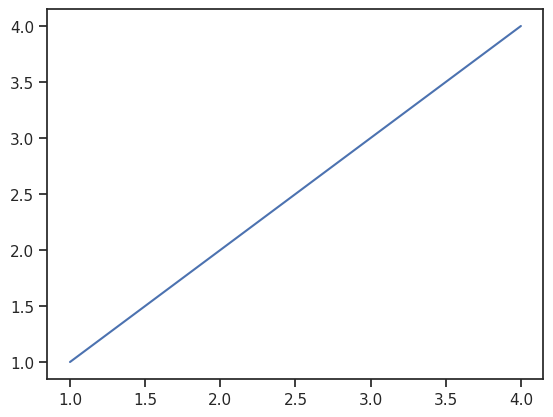

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot([1, 2, 3, 4], [1, 2, 3, 4])
plt.show()

In [20]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Y-axis')

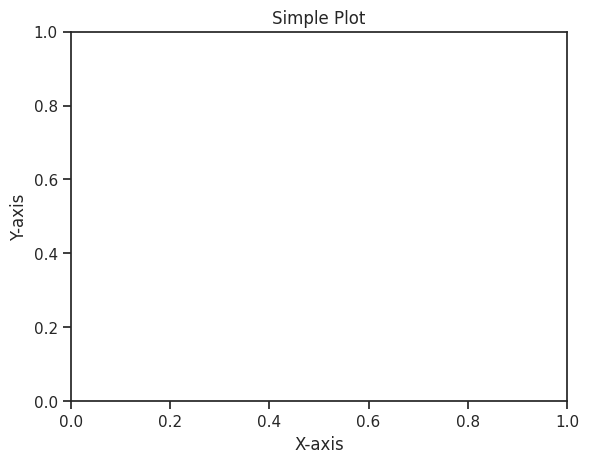

In [21]:
fig, ax = plt.subplots()
ax.set_title('Simple Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')


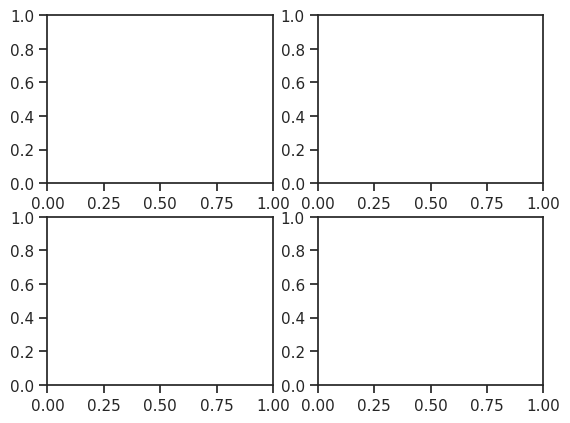

In [22]:
fig, axs = plt.subplots(2, 2)

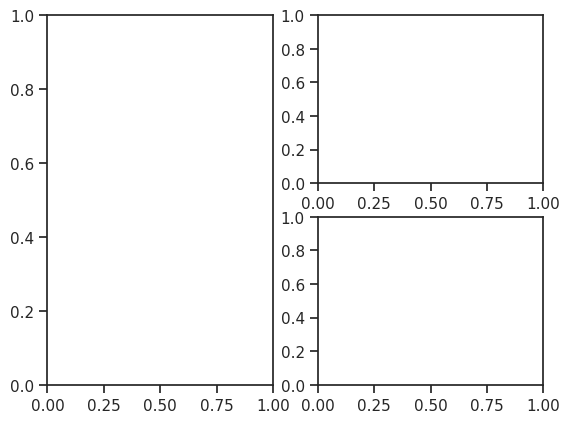

In [23]:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left','right_bottom']])

In [24]:
!pip install bokeh


In [25]:
from bokeh.plotting import figure, show

In [26]:
# define two lists containing the data for the line chart:

x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]
p = figure(title = 'Sample line example', x_axis_label = 'X', y_axis_label = 'Y')
p.line(x, y, legend_label = 'Temp.', line_width = 2)
show(p)

In [27]:
from bokeh.plotting import figure, show

# prepare some data
x = [1, 2, 3, 4, 5]
y1 = [6, 7, 2, 4, 5]
y2 = [2, 3, 4, 5, 6]
y3 = [4, 5, 5, 7, 2]

# create a new plot with a title and axis labels
p = figure(title="Multiple glyphs example", x_axis_label="x", y_axis_label="y")

# add multiple renderers
p.line(x, y1, legend_label="Temp.", color="#004488", line_width=3)
p.line(x, y2, legend_label="Rate", color="#906c18", line_width=3)
p.scatter(x, y3, legend_label="Objects", color="#bb5566", size=16)

# show the results
show(p)

In [28]:
# import altair with an abbreviated alias
import altair as alt

# load a sample dataset as a pandas DataFrame
from vega_datasets import data
cars = data.cars()

# make the chart
alt.Chart(cars).mark_point().encode(
    x='Horsepower',
    y='Miles_per_Gallon',
    color='Origin',
).interactive()


/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
/usr/local/lib/python3.10/dist-packages/altair/utils/core.py:384: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

### 12 python data visulisations for business analysis: https://mode.com/blog/python-data-visualization-libraries

In [29]:
%matplotlib inline

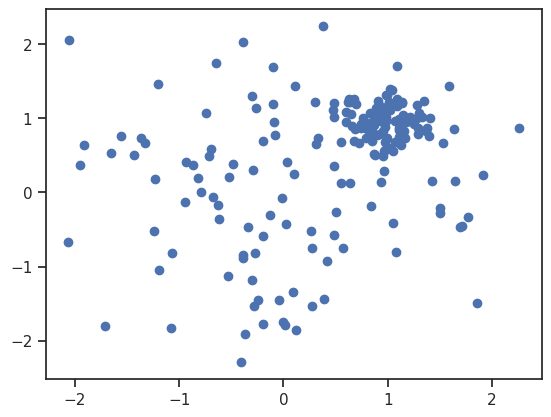

In [30]:
import numpy as np
np.random.seed(7)

sample1 = np.random.multivariate_normal([0,0],[[1,0],[0,1]],100)
sample2 = np.random.multivariate_normal([1,1],[[0.05,0],[0,0.05]],100)
sample = np.concatenate((sample1,sample2))
plt.scatter(sample[:,0],sample[:,1])

Let's break down the code and explain the plot it generated:

### Code Breakdown:

1. **`np.random.seed(7)`**:
   - Sets the random seed to `7`. This ensures that the random numbers generated will be the same every time the code is run. It's used to make the results reproducible.

2. **`np.random.multivariate_normal([0, 0], [[1, 0], [0, 1]], 100)`**:
   - This generates `100` random samples from a **multivariate normal distribution** with:
     - **Mean vector** `[0, 0]` (centered at the origin).
     - **Covariance matrix** `[[1, 0], [0, 1]]` (which means the two variables are uncorrelated and have a variance of 1 each).
   - This creates `100` random points, forming a cluster centered around the origin (0,0).

3. **`np.random.multivariate_normal([1, 1], [[0.05, 0], [0, 0.05]], 100)`**:
   - This generates `100` random samples from another **multivariate normal distribution** with:
     - **Mean vector** `[1, 1]` (centered at point `(1, 1)`).
     - **Covariance matrix** `[[0.05, 0], [0, 0.05]]` (which means the two variables have a very small variance, leading to a tightly packed cluster).
   - This creates another group of `100` points, forming a tight cluster centered at `(1,1)`.

4. **`np.concatenate((sample1, sample2))`**:
   - Combines the two sets of samples (`sample1` and `sample2`) into a single dataset with 200 points (100 from each sample).

5. **`plt.scatter(sample[:, 0], sample[:, 1])`**:
   - This creates a scatter plot of the combined sample data.
   - `sample[:, 0]` refers to all the x-coordinates (the first column of the dataset).
   - `sample[:, 1]` refers to all the y-coordinates (the second column of the dataset).

### Plot Explanation:
- The plot shows **200 points** in total.
  - The **larger spread** of points is from the first multivariate normal distribution (with mean `[0,0]` and variance of 1), forming a relatively loose cluster around the origin.
  - The **tighter cluster** of points near `(1,1)` is from the second multivariate normal distribution (with a very small variance of `0.05`), resulting in points being densely packed.

### Summary:
- The code generates two sets of points from different multivariate normal distributions:
  - One loosely spread cluster around `[0,0]`.
  - One tightly packed cluster around `[1,1]`.
- The resulting scatter plot shows both sets of points, clearly highlighting the difference in spread and distribution between the two samples.

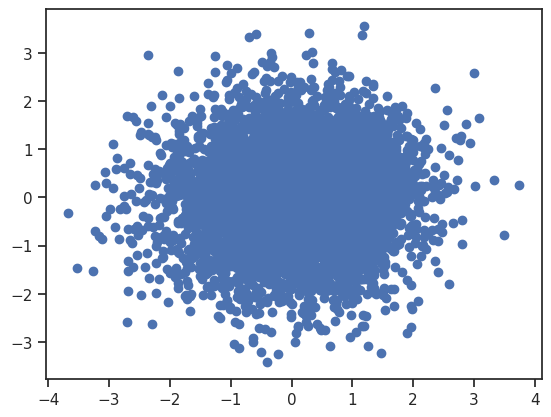

In [31]:
sample1 = np.random.multivariate_normal([0,0],[[1,0],[0,1]],5000)
sample2 = np.random.multivariate_normal([1,1],[[0.05,0],[0,0.05]],5000)
sample = np.concatenate((sample1,sample2))
plt.scatter(sample[:,0],sample[:,1])

## Bokeh

* is an interactive visualisation library that targets modern web browsers for presentation.

* it is good for:

  - interactive visualization in modern browsers.
  - standalone HTML documents or server-backed apps
  - Expressive and versatile graphcs
  - Large, dynamic or straming data
  - Easy usage from python (or Scala, or R,....)

In [32]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

tools = "hover, box_zoom, undo, crosshair"
p = figure(tools=tools)
p.scatter(sample[:,0], sample[:,1], alpha=0.5)
show(p)

In [33]:
# addign widgets

from ipywidgets import widgets

#buttons
button = widgets.Button(description = "Click Me")
display(button)

def on_button_clicked(b):
  print("Welcome to Data Science Visulatisation")

button.on_click(on_button_clicked)


Button(description='Click Me', style=ButtonStyle())

In [34]:
from ipywidgets import widgets

#buttons
display(button)

def on_button_clicked(b):
  print("Click here for detail report and visualisation")

button.on_click(on_button_clicked)

Button(description='Click Me', style=ButtonStyle())

In [35]:
inputText = widgets.Text("Description: Enter a value")

def makeUpperCase(sender):
  outputText.value = inputText.value.upper()

inputText.on_submit(makeUpperCase)

inputText

Text(value='Description: Enter a value')

In [36]:
outputText = widgets.Text()
outputText

Text(value='')

In [37]:
from bokeh.layouts import column
from bokeh.models import CustomJS, ColumnDataSource, Slider
from bokeh.plotting import figure

x = [x*0.005 for x in range(0, 201)]

source = ColumnDataSource(data=dict(x=x, y=x))

plot = figure(plot_width=400, plot_height=400)
plot.line('x', 'y', source=source, line_width=3, line_alpha=0.6)

slider = Slider(start=0.1, end=6, value=1, step=.1, title="power")

update_curve = CustomJS(args=dict(source=source, slider=slider), code="""
    var data = source.data;
    var f = slider.value;
    var x = data['x']
    var y = data['y']
    for (var i = 0; i < x.length; i++) {
        y[i] = Math.pow(x[i], f)
    }

    // necessary becasue we mutated source.data in-place
    source.change.emit();
""")
slider.js_on_change('value', update_curve)


show(column(slider, plot))

AttributeError: unexpected attribute 'plot_width' to figure, similar attributes are outer_width, width or min_width

# Visulalising Geospatial data with python

source: https://medium.datadriveninvestor.com/visualising-geospatial-data-with-python-d3b1c519f31?gi=81f63a6ec8c3

Data: https://www.kaggle.com/code/parulpandey/visualising-geospatial-data-to-get-insights


Main Indicators are:

* Adolescent fertility rate (births per 1,000 women)
* CO2 emissions (metric tons per capita)
* Merchandise exports by the reporting economy
* Time required to build a warehouse (days)
* Total tax rate (% of commercial profits)
* Life expectancy at birth, female (years)




In [28]:
import folium
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

It looks like there's a small typo in your code with the `warnings` module. Specifically, in the line:

```python
warnings.filterwarngings("ignore")
```

The correct function name is `warnings.filterwarnings()` (not `filterwarngings`), so the corrected code should look like this:

### Corrected Code:
```python
import folium
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
```

### Explanation:
1. **`import folium`**: This imports the **`folium`** library, which is used for generating interactive maps in Python. Folium allows you to create maps with markers, popups, layers, and more, using the Leaflet.js library behind the scenes.
   
2. **`import pandas as pd`**: This imports **`pandas`**, which is a powerful library for data manipulation and analysis. It is often used to load and process data, such as geographical coordinates, before using them in mapping or other visualizations.

3. **`warnings.filterwarnings("ignore")`**: This disables or **ignores warnings** in your code. Warnings are often useful during development, but if you're sure they are not significant or if they clutter your output, you can ignore them using this line.

### Example Usage of `folium` and `pandas`:

If you're planning to use **folium** and **pandas** together, here’s an example of how you can create a map with markers based on data from a pandas DataFrame:

```python
# Example Data
data = {
    'name': ['Location 1', 'Location 2', 'Location 3'],
    'latitude': [37.77, 37.78, 37.79],
    'longitude': [-122.42, -122.43, -122.44]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a map centered at an average location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Add markers to the map
for i, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name']
    ).add_to(m)

# Display the map
m
```

### Explanation:
- A simple pandas DataFrame `df` is created with locations (latitude, longitude) and names.
- A folium map is initialized and centered on the average latitude and longitude of the locations in the DataFrame.
- Markers are added to the map using `folium.Marker()`, where each marker corresponds to a row in the DataFrame.
- The map `m` is then displayed, and in a Jupyter notebook, you would see an interactive map with clickable markers.

Let me know if you'd like more specific examples with **folium**!

In [40]:
# Example Data
data = {
    'name': ['Location 1', 'Location 2', 'Location 3'],
    'latitude': [37.77, 37.78, 37.79],
    'longitude': [-122.42, -122.43, -122.44]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Create a map centered at an average location
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)

# Add markers to the map
for i, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name']
    ).add_to(m)

# Display the map
m


Here’s a detailed explanation of each part of the code provided:

### 1. **Importing Libraries**
```python
import folium
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
```

- **`import folium`**:
  - This imports the **folium** library, which allows you to create **interactive maps** in Python. Folium uses **Leaflet.js** (a JavaScript library for interactive maps) behind the scenes, and it's very useful for plotting maps with markers, popups, heatmaps, and more.
  
- **`import pandas as pd`**:
  - This imports the **pandas** library, which is one of the most widely used libraries for data manipulation and analysis in Python. It's often used to handle tabular data, such as CSV files, Excel sheets, or SQL tables, and offers powerful tools for handling large datasets.
  
- **`warnings.filterwarnings("ignore")`**:
  - This line tells Python to **ignore any warning messages**. Warnings are typically used by libraries to alert you of possible issues (such as deprecated features), but they don't necessarily stop your code from running. This line can be used if you don’t want those warnings to clutter your output.

---

### 2. **Creating a DataFrame with Location Data**
```python
data = {
    'name': ['Location 1', 'Location 2', 'Location 3'],
    'latitude': [37.77, 37.78, 37.79],
    'longitude': [-122.42, -122.43, -122.44]
}

df = pd.DataFrame(data)
```

- **`data = {...}`**:
  - This creates a **dictionary** with three keys: `name`, `latitude`, and `longitude`. Each key contains a list of values:
    - `name`: A list of three names for the locations (e.g., "Location 1", "Location 2", etc.).
    - `latitude` and `longitude`: Lists of corresponding latitude and longitude coordinates for each location.

- **`df = pd.DataFrame(data)`**:
  - This converts the dictionary into a **pandas DataFrame** called `df`. A DataFrame is a 2D tabular data structure (like a table or a spreadsheet) where each column contains one type of data. Here, the DataFrame will contain three columns: `name`, `latitude`, and `longitude`.

  - The `df` DataFrame will look like this:
    ```
          name  latitude  longitude
    0  Location 1     37.77    -122.42
    1  Location 2     37.78    -122.43
    2  Location 3     37.79    -122.44
    ```

---

### 3. **Creating a Map**
```python
m = folium.Map(location=[df['latitude'].mean(), df['longitude'].mean()], zoom_start=12)
```

- **`folium.Map()`**:
  - This initializes a **map object**. It creates a base map that can be displayed and interacted with. It accepts various parameters such as the center of the map and the zoom level.
  
- **`location=[df['latitude'].mean(), df['longitude'].mean()]`**:
  - The **location** parameter defines the initial center point of the map. The code uses the **mean** of the latitude and longitude columns from the `df` DataFrame, meaning the map will be centered at the **average location** of the three points in the DataFrame.
  - The **`df['latitude'].mean()`** returns the average latitude, and **`df['longitude'].mean()`** returns the average longitude.

- **`zoom_start=12`**:
  - This sets the initial **zoom level** of the map. A zoom level of `12` is a medium zoom level, where you can see a city-level view of the map.

---

### 4. **Adding Markers to the Map**
```python
for i, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name']
    ).add_to(m)
```

- **`for i, row in df.iterrows()`**:
  - This is a loop that **iterates over each row** of the DataFrame `df`.
  - **`i`** is the index of the row (0, 1, 2, ...), and **`row`** is the data of each row in the DataFrame.

- **`folium.Marker()`**:
  - This creates a **marker** on the map at a specific latitude and longitude.
  - **`location=[row['latitude'], row['longitude']]`**: The **location** parameter uses the latitude and longitude of the current row in the loop to place the marker at that specific point on the map.
  
- **`popup=row['name']`**:
  - This creates a **popup** for the marker. When you click the marker on the map, the popup shows the name of the location from the DataFrame (`Location 1`, `Location 2`, etc.).

- **`.add_to(m)`**:
  - This adds the marker to the map object `m`. Without this, the marker wouldn’t be displayed on the map.

---

### 5. **Displaying the Map**
```python
m
```

- This line simply **displays the map** in a Jupyter notebook. The map will include all the markers added in the previous step, and users can zoom in/out or pan around the map interactively.

---

### Summary:
- This code loads location data into a **pandas DataFrame**.
- It creates a **folium map** centered at the average latitude and longitude of the locations.
- It **adds markers** for each location with a popup containing the name.
- Finally, it **displays the map** in a Jupyter notebook, where it can be interacted with.

This is a simple but powerful way to combine **data analysis (pandas)** with **data visualization (folium)** to create interactive geographical maps.

The `iterrows()` function in pandas is a method that allows you to **iterate over the rows** of a DataFrame, returning each row as an (index, Series) pair. It is a convenient way to loop through a DataFrame row by row.

### Detailed Explanation of `iterrows()`:

```python
for i, row in df.iterrows():
    print(i)  # prints the index of the row
    print(row)  # prints the data in that row
```

- **`for i, row in df.iterrows()`**:
  - This is a **for-loop** that iterates over each row of the DataFrame `df`.
  - **`i`**: The **index** of the current row in the DataFrame. This can be an integer (if the DataFrame has default integer indices) or a custom index if specified in the DataFrame.
  - **`row`**: A **pandas Series** object representing the data of the current row. Each row in the DataFrame is converted into a Series, where the column names are the indices (keys), and the values are the actual data points for that row.

### Example:

Consider a simple DataFrame:

```python
import pandas as pd

data = {'Name': ['Alice', 'Bob', 'Charlie'],
        'Age': [25, 30, 35]}

df = pd.DataFrame(data)
```

This would create the following DataFrame:

```
       Name  Age
0     Alice   25
1       Bob   30
2   Charlie   35
```

If you iterate over the DataFrame using `iterrows()`:

```python
for i, row in df.iterrows():
    print("Index:", i)
    print("Row data:\n", row)
```

The output would be:

```
Index: 0
Row data:
 Name    Alice
Age        25
Name: 0, dtype: object

Index: 1
Row data:
 Name    Bob
Age      30
Name: 1, dtype: object

Index: 2
Row data:
 Name    Charlie
Age          35
Name: 2, dtype: object
```

### How it Works:
- **`i`**: The index of the row (0, 1, 2...).
- **`row`**: A pandas **Series** object that contains all the values in the row. The column names (`Name`, `Age`) are the indices in the Series.

### Usage in Your Example:

```python
for i, row in df.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=row['name']
    ).add_to(m)
```

- **`i`**: In this context, `i` is the index of the current row (0, 1, 2, ...).
- **`row`**: Represents the actual row data, where `row['latitude']`, `row['longitude']`, and `row['name']` refer to the specific columns for that row.
  - **`row['latitude']`** gives the latitude value for the current row.
  - **`row['longitude']`** gives the longitude value for the current row.
  - **`row['name']`** gives the name of the location for the current row.
  
This allows you to create markers for each row in the DataFrame, with the marker's position based on the `latitude` and `longitude` columns and the popup containing the `name` of the location.

### Notes:
- **Performance**: `iterrows()` can be slow for large DataFrames because it returns a Series for each row, which can be computationally expensive. For small or moderate-sized DataFrames, it’s fine, but for larger ones, alternatives like `apply()` or vectorized operations should be used.
- **Modifications**: If you modify `row` inside the loop, it will not affect the original DataFrame because `iterrows()` returns a copy of the data, not a view.

### In Summary:
`iterrows()` is a method used to iterate over a pandas DataFrame row by row. Each row is returned as a tuple where the first element is the index, and the second is the row's data as a pandas Series. It is useful when you need to perform row-wise operations, like adding markers to a map based on the latitude and longitude data.

In [41]:
for i, row in df.iterrows():
    print(i)  # prints the index of the row
    print(row)  # prints the data in that row


0
name         Location 1
latitude          37.77
longitude       -122.42
Name: 0, dtype: object
1
name         Location 2
latitude          37.78
longitude       -122.43
Name: 1, dtype: object
2
name         Location 3
latitude          37.79
longitude       -122.44
Name: 2, dtype: object


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import pandas as pd
country_geo = pd.read_json('/content/drive/MyDrive/MQ/First Session/Data Science/files/world-countries.json')
data = pd.read_csv('/content/drive/MyDrive/MQ/First Session/Data Science/files/Indicators.csv')
print(data.shape)
print(data.head())

(5656458, 6)
  CountryName CountryCode                                      IndicatorName  \
0  Arab World         ARB  Adolescent fertility rate (births per 1,000 wo...   
1  Arab World         ARB  Age dependency ratio (% of working-age populat...   
2  Arab World         ARB  Age dependency ratio, old (% of working-age po...   
3  Arab World         ARB  Age dependency ratio, young (% of working-age ...   
4  Arab World         ARB        Arms exports (SIPRI trend indicator values)   

    IndicatorCode  Year         Value  
0     SP.ADO.TFRT  1960  1.335609e+02  
1     SP.POP.DPND  1960  8.779760e+01  
2  SP.POP.DPND.OL  1960  6.634579e+00  
3  SP.POP.DPND.YG  1960  8.102333e+01  
4  MS.MIL.XPRT.KD  1960  3.000000e+06  


In [8]:
# checking the unique countries and indicators
countries = data['CountryName'].unique().tolist()
print(len(countries))

indicators = data['IndicatorName'].unique().tolist()
print(len(indicators))

247
1344


In [10]:
data['IndicatorName'].value_counts()

,count
IndicatorName,
"Population, total",13484
Population growth (annual %),13442
Rural population (% of total population),13415
Urban population (% of total),13415
Urban population,13374
...,...
"Present value of external debt (% of exports of goods, services and primary income)",69
Benefits incidence in poorest quintile (%) - All Labor Market,67
Adequacy of unemployment benefits and ALMP (% of total welfare of beneficiary households),67


In [11]:
# visualising few indicators from the top
data['IndicatorName'][:15]

,IndicatorName
0,"Adolescent fertility rate (births per 1,000 wo..."
1,Age dependency ratio (% of working-age populat...
2,"Age dependency ratio, old (% of working-age po..."
3,"Age dependency ratio, young (% of working-age ..."
4,Arms exports (SIPRI trend indicator values)
5,Arms imports (SIPRI trend indicator values)
6,"Birth rate, crude (per 1,000 people)"
7,CO2 emissions (kt)
8,CO2 emissions (metric tons per capita)
9,CO2 emissions from gaseous fuel consumption (%...


For analysis, we focus on life expectancy at birth (years) for a particular year.

We can randoml pick any year from 1960 to 2015.

In [12]:
indicatorname = data['IndicatorName'].str.contains('Life expectancy at birth')
data[indicatorname].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
20,Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,47.883246
21,Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,45.862949
22,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,1960,46.847059
101,Caribbean small states,CSS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,1960,64.307102
102,Caribbean small states,CSS,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,1960,60.336875


In [13]:
year_2013 = data['Year'] == 2013
data[year_2013].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5377431,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,2013,8.520884e+01
5377432,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,2013,8.348750e+01
5377433,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,2013,8.685386e+01
5377434,Arab World,ARB,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,2013,2.067663e+12
5377435,Arab World,ARB,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,2013,5.483110e+03


We can also use __isin()__ method to select particular year or within range.


In [14]:
year_using_isin = data['Year'].isin([2013])
data[year_using_isin].head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5377431,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,2013,8.520884e+01
5377432,Arab World,ARB,"Adjusted net enrolment rate, primary, female (%)",SE.PRM.TENR.FE,2013,8.348750e+01
5377433,Arab World,ARB,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,2013,8.685386e+01
5377434,Arab World,ARB,Adjusted net national income (current US$),NY.ADJ.NNTY.CD,2013,2.067663e+12
5377435,Arab World,ARB,Adjusted net national income per capita (curre...,NY.ADJ.NNTY.PC.CD,2013,5.483110e+03


In [15]:
# let's combine both new selectd dataframe at one selected_data

selected_data = data[indicatorname & year_2013]
selected_data.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
5377669,Arab World,ARB,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,72.536117
5377670,Arab World,ARB,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,2013,68.848383
5377671,Arab World,ARB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,2013,70.631305
5378129,Caribbean small states,CSS,"Life expectancy at birth, female (years)",SP.DYN.LE00.FE.IN,2013,74.757382
5378130,Caribbean small states,CSS,"Life expectancy at birth, male (years)",SP.DYN.LE00.MA.IN,2013,69.183365


In [21]:
# selecting only the countrycode and value columns
data_to_plot = selected_data[['CountryCode', 'Value']]
data_to_plot.head()

,CountryCode,Value
5377669,ARB,72.536117
5377670,ARB,68.848383
5377671,ARB,70.631305
5378129,CSS,74.757382
5378130,CSS,69.183365


In [25]:
legend_indicator = selected_data.iloc[0]['IndicatorName']
legend_indicator

'Life expectancy at birth, female (years)'

In [32]:
# Create the map
map = folium.Map(location=[100, 0], zoom_start=1.5)

# Create a Choropleth map
folium.Choropleth(
    geo_data=country_geo,         # The GeoJSON file for the world map
    name="choropleth",            # Layer name
    data=data_to_plot,            # Data to be plotted
    columns=['CountryCode', 'Value'],  # Columns in the DataFrame: country code and the value to plot
    key_on='feature.id',          # Key in the GeoJSON to match the data
    fill_color='YlGnBu',          # Color scheme
    fill_opacity=0.7,             # Opacity for the colors
    line_opacity=0.2,             # Opacity for the boundary lines
    legend_name=legend_indicator  # Legend to explain the data
).add_to(map)

# Optionally, you can add layer control for switching on and off layers (if you have multiple layers)
folium.LayerControl().add_to(map)

# Display the map
map


ValueError: Cannot render objects with any missing geometries:                   type                                           features
0    FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Af...
1    FeatureCollection  {'type': 'Feature', 'properties': {'name': 'An...
2    FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Al...
3    FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Un...
4    FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Ar...
..                 ...                                                ...
172  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'We...
173  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Ye...
174  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'So...
175  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Za...
176  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Zi...

[177 rows x 2 columns]

In [33]:
# create Folium plot

map.save('plot_data.html')

#import the folium interactive html file
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')

In [34]:
import folium
import pandas as pd

# Create the map
map = folium.Map(location=[100, 0], zoom_start=1.5)

# Create a Choropleth map
folium.Choropleth(
    geo_data=country_geo,         # The GeoJSON file for the world map
    name="choropleth",            # Layer name
    data=data_to_plot,            # Data to be plotted
    columns=['CountryCode', 'Value'],  # Columns in the DataFrame: country code and the value to plot
    key_on='feature.id',          # Key in the GeoJSON to match the data
    fill_color='YlGnBu',          # Color scheme
    fill_opacity=0.7,             # Opacity for the colors
    line_opacity=0.2,             # Opacity for the boundary lines
    legend_name=legend_indicator  # Legend to explain the data
).add_to(map)

# Optionally, you can add layer control for switching on and off layers
folium.LayerControl().add_to(map)

# Save the map as an HTML file
map.save('plot_data.html')

# Import and display the Folium interactive HTML file in a Jupyter Notebook
from IPython.display import HTML
HTML('<iframe src=plot_data.html width=700 height=450></iframe>')


ValueError: Cannot render objects with any missing geometries:                   type                                           features
0    FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Af...
1    FeatureCollection  {'type': 'Feature', 'properties': {'name': 'An...
2    FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Al...
3    FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Un...
4    FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Ar...
..                 ...                                                ...
172  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'We...
173  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Ye...
174  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'So...
175  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Za...
176  FeatureCollection  {'type': 'Feature', 'properties': {'name': 'Zi...

[177 rows x 2 columns]